<a href="https://colab.research.google.com/github/kangand/1000ml/blob/master/Assignment_7/CNN_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='w'

In [2]:
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Drive


In [11]:
import torch

from fastai.vision import get_transforms
from fastai.vision.data import ImageList, ImageDataBunch
from fastai.vision import defaults
from fastai.metrics import error_rate, accuracy
from fastai.vision.learner import create_cnn, cnn_learner, load_learner
from fastai.vision.models import squeezenet1_0
from fastai.widgets import *

In [18]:
defaults.device = torch.device('cuda')

In [5]:
tfms = get_transforms(do_flip=True, 
                      max_rotate=25)

path = '/content/Drive/My Drive/jewelery_images'

In [6]:
test_data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, valid='test')

In [8]:
test_data.batch_size = 128

In [9]:
test_data

ImageDataBunch;

Train: LabelList (1006 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
earrings,earrings,earrings,earrings,earrings
Path: /content/Drive/My Drive/jewelery_images;

Valid: LabelList (254 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ring,ring,ring,ring,ring
Path: /content/Drive/My Drive/jewelery_images;

Test: None

In [13]:
learner = load_learner(path, 'squeezenet_model')

In [20]:
learner.data = test_data

In [28]:
%%time

learner.validate(test_data.valid_dl)

CPU times: user 12.6 s, sys: 4.53 s, total: 17.1 s
Wall time: 27.2 s


[0.38867325, tensor(0.8937)]

In [22]:
test_interp = ClassificationInterpretation.from_learner(learner)

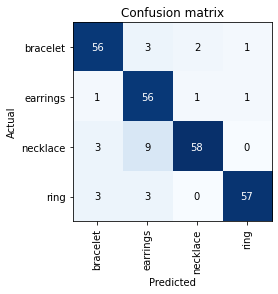

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fc1e08420b8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/

In [23]:
test_interp.plot_confusion_matrix()

In [24]:
test_interp.most_confused()

[('necklace', 'earrings', 9),
 ('bracelet', 'earrings', 3),
 ('necklace', 'bracelet', 3),
 ('ring', 'bracelet', 3),
 ('ring', 'earrings', 3),
 ('bracelet', 'necklace', 2),
 ('bracelet', 'ring', 1),
 ('earrings', 'bracelet', 1),
 ('earrings', 'necklace', 1),
 ('earrings', 'ring', 1)]

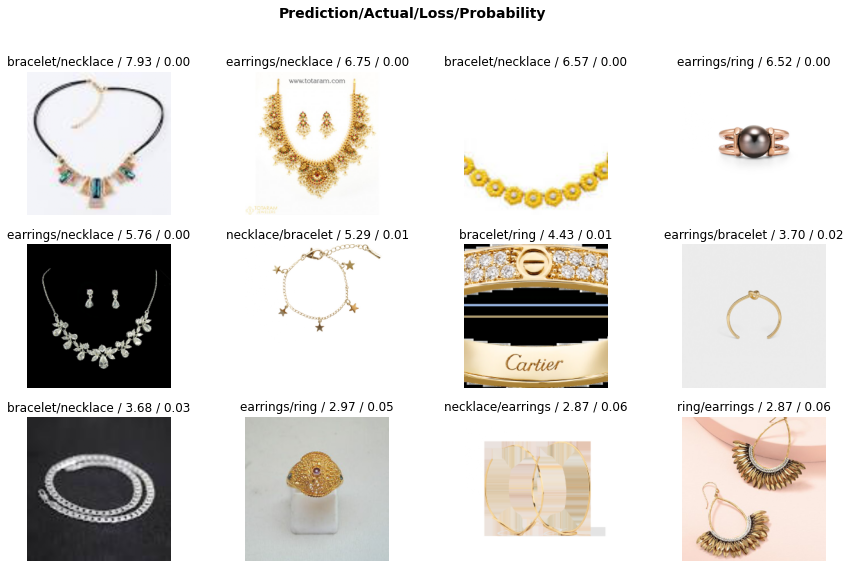

In [27]:
test_interp.plot_top_losses(12, figsize=(15,9))